In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [3]:
heart_failure= pd.read_csv("heart_failure_clinical_records_dataset (1).csv")

In [4]:
heart_failure

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [5]:
heart_failure.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
print(heart_failure.dtypes)

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [83]:
binary= [col for col in heart_failure.columns if heart_failure[col].nunique() == 2]
print("Categorical values:",binary)
print(len(binary))

Categorical values: ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
6


In [8]:
heart_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
#no missing values present
#Out of 13 features 6 binary variables and 7 continuous variables present
"""Age:
1)Mean age: 60.83 years
Age range: 40 to 95 years
The standard deviation (11.89) suggests a moderate spread around the mean.

2)Anaemia:
Mean: 43% of the patients have anaemia.
Standard deviation: 0.50, reflecting the binary nature of the variable.

3)Creatinine Phosphokinase:
Mean: 581.84 units/L
Range: 23 to 7861 units/L
standard deviation: (970.29) indicates a large variation in enzyme levels among patients.

4)Diabetes:
Mean: 42% of patients have diabetes.
Standard deviation: 0.49, consistent with the binary nature.

5)Ejection Fraction:
Mean: 38.08%
Range: 14% to 80%
Standard deviation: 11.83, indicating variation in heart pumping efficiency.

6)High Blood Pressure:
Mean: 35% of patients have high bp.

7)Platelets:
Range: 25100 to 850000 platelets/mL
High standard deviation (97804), indicating significant variability in platelet counts.

8)Serum Creatinine:
Mean:1.39 mg/dL
Range:0.5 to 9.4 mg/dL
Standard deviation: 1.03, showing variability in kidney function.

9)Serum Sodium:
Mean: 136.63
Range: 113 to 148
Standard deviation: 4.41, relatively narrow range of serum sodium levels.

10)Sex:
Mean: 65% of the patients are male.

11)Smoking:
32% smokers

12)Time:
Mean: 130.26 days
Range: 4 to 285 days
Standard deviation: 77.61, indicating variability

13)Death event:
32% patients died

"""


'Age:\n1)Mean age: 60.83 years\nAge range: 40 to 95 years\nThe standard deviation (11.89) suggests a moderate spread around the mean.\n\n2)Anaemia:\nMean: 43% of the patients have anaemia.\nStandard deviation: 0.50, reflecting the binary nature of the variable.\n\n3)Creatinine Phosphokinase:\nMean: 581.84 units/L\nRange: 23 to 7861 units/L\nstandard deviation: (970.29) indicates a large variation in enzyme levels among patients.\n\n4)Diabetes:\nMean: 42% of patients have diabetes.\nStandard deviation: 0.49, consistent with the binary nature.\n\n5)Ejection Fraction:\nMean: 38.08%\nRange: 14% to 80%\nStandard deviation: 11.83, indicating variation in heart pumping efficiency.\n\n6)High Blood Pressure:\nMean: 35% of patients have high bp.\n\n7)Platelets:\nRange: 25100 to 850000 platelets/mL\nHigh standard deviation (97804), indicating significant variability in platelet counts.\n\n8)Serum Creatinine:\nMean:1.39 mg/dL\nRange:0.5 to 9.4 mg/dL\nStandard deviation: 1.03, showing variability i

In [10]:
#Rescaling data.It helps gradient descent to converge faster in logistic regression model.
from sklearn.preprocessing import StandardScaler

#Numerical features only
features_to_standardize = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
                           'platelets', 'serum_creatinine', 'serum_sodium', 'time']
scaler=StandardScaler()
heart_failure[features_to_standardize]=scaler.fit_transform(heart_failure[features_to_standardize])

In [11]:
#outlier detection
Q1=heart_failure.quantile(0.25)
Q3=heart_failure.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age                         1.600013
anaemia                     1.000000
creatinine_phosphokinase    0.480559
diabetes                    1.000000
ejection_fraction           1.269569
high_blood_pressure         1.000000
platelets                   0.931990
serum_creatinine            0.484131
serum_sodium                1.362060
sex                         1.000000
smoking                     1.000000
time                        1.677759
DEATH_EVENT                 1.000000
dtype: float64


In [12]:
print((heart_failure< (Q1-1.5*IQR))|(heart_failure> (Q3+1.5*IQR)))

       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    False    False                     False     False              False   
1    False    False                      True     False              False   
2    False    False                     False     False              False   
3    False    False                     False     False              False   
4    False    False                     False     False              False   
..     ...      ...                       ...       ...                ...   
294  False    False                     False     False              False   
295  False    False                      True     False              False   
296  False    False                      True     False              False   
297  False    False                      True     False              False   
298  False    False                     False     False              False   

     high_blood_pressure  platelets  serum_creatinine  serum_so

In [13]:
heart_failure_out = heart_failure[~((heart_failure< (Q1 - 1.5 * IQR)) |(heart_failure > (Q3 + 1.5 * IQR))).any(axis=1)]
heart_failure_out.shape


(224, 13)

In [14]:
#75 datapoints are lost.That's huge relative to 299.

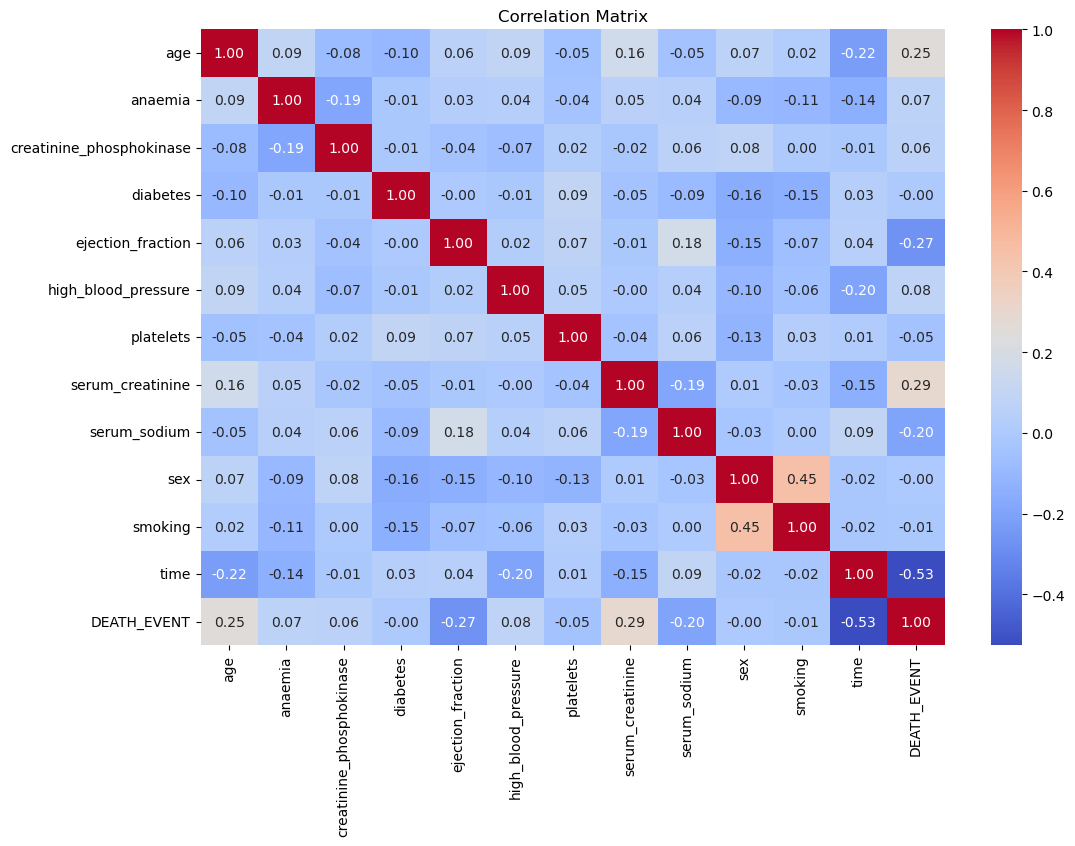

In [15]:
#correlation analysis
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix= heart_failure.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
corr_with_target= corr_matrix['DEATH_EVENT'].sort_values(ascending=False)
print("Correlation with DEATH_EVENT:\n", corr_with_target)

Correlation with DEATH_EVENT:
 DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64


In [17]:
#It seems that smoking and sex have significant dependency(0.47) on each other. It may cause redundancy.
#We may create a new feature called sex_smoking_rel having binary values with male smokers and female non-smokers as 1 and rest as 0.
#But I feel that generally smoking is prevalent in men, so it may be due to that we see a higher correlation. 
#Doing feature engineering here may cause overfitting.

<Axes: xlabel='age'>

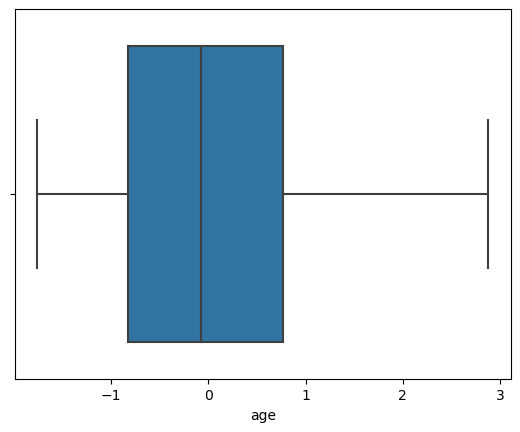

In [18]:
import seaborn as sns
sns.boxplot(x=heart_failure['age'])

<Axes: xlabel='creatinine_phosphokinase'>

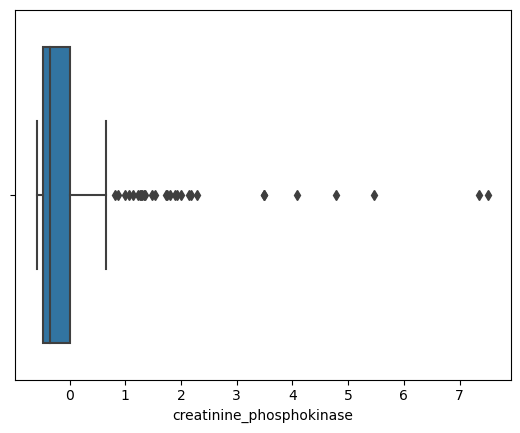

In [19]:
sns.boxplot(x=heart_failure['creatinine_phosphokinase'])

In [20]:
#Too many outliers. Correlation of creatinine phosphate with target: 0.05. Hence this feature can be drpped.

<Axes: xlabel='ejection_fraction'>

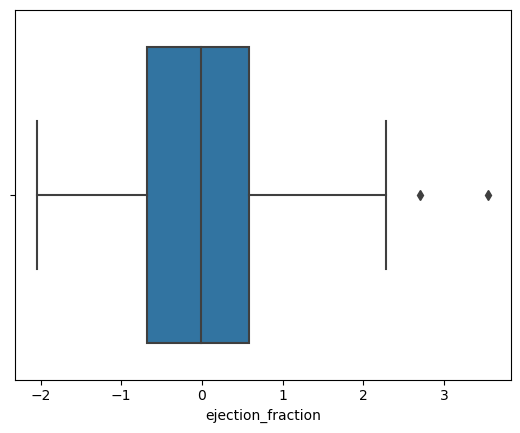

In [21]:
sns.boxplot(x=heart_failure['ejection_fraction'])
#only two outliers. Acceptable.

<Axes: xlabel='platelets'>

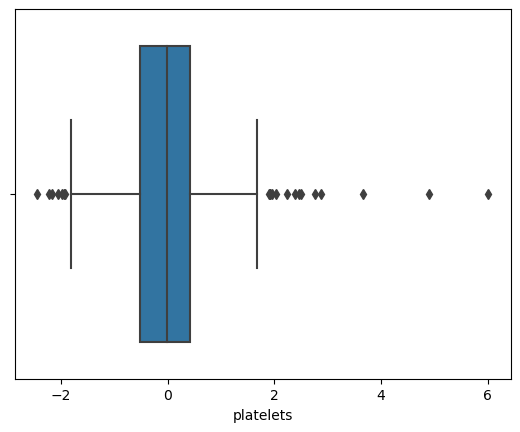

In [82]:
sns.boxplot(x=heart_failure['platelets'])
#too many outliers. Correlation with target: -0.05. Can be dropped

<Axes: xlabel='serum_creatinine'>

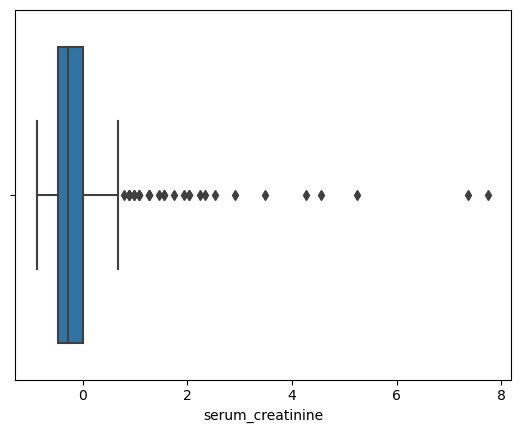

In [24]:
sns.boxplot(x=heart_failure['serum_creatinine'])
#many outliers but its correlation with target is 0.29. Will keep it.

<Axes: xlabel='serum_sodium'>

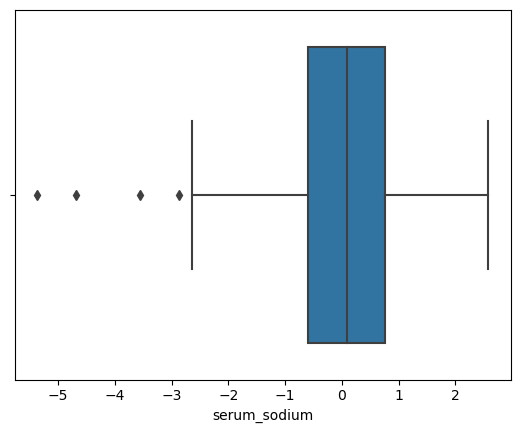

In [25]:
sns.boxplot(x=heart_failure['serum_sodium'])
#Acceptable no. of outliers

<Axes: xlabel='time'>

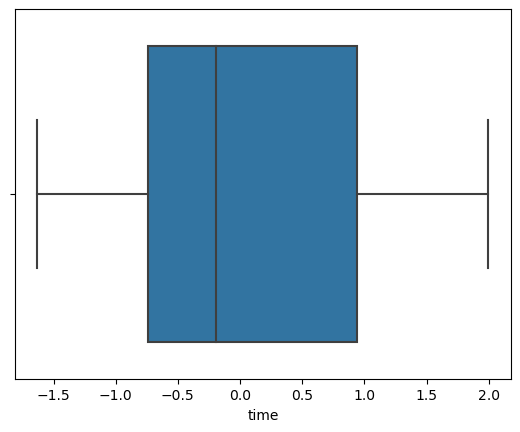

In [26]:
sns.boxplot(x=heart_failure['time'])

In [57]:
heart_failure_new= heart_failure.drop(columns= ['creatinine_phosphokinase','platelets'])

In [58]:
Q1=heart_failure_new.quantile(0.25)
Q3=heart_failure_new.quantile(0.75)
IQR=Q3-Q1
print(IQR)

age                    1.600013
anaemia                1.000000
diabetes               1.000000
ejection_fraction      1.269569
high_blood_pressure    1.000000
serum_creatinine       0.484131
serum_sodium           1.362060
sex                    1.000000
smoking                1.000000
time                   1.677759
DEATH_EVENT            1.000000
dtype: float64


In [59]:
heart_failure_out = heart_failure_new[~((heart_failure_new < (Q1 - 1.5 * IQR)) | (heart_failure_new > (Q3 + 1.5 * IQR))).any(axis=1)]
heart_failure_out.shape

#better.


(266, 11)

In [60]:
#Sodium Creatinine has a small standard deviation but significant impact on target(0.35).Hence we may not remove the column.

In [61]:
duplicate_rows = heart_failure_out.duplicated()
print(heart_failure_out[duplicate_rows])

Empty DataFrame
Columns: [age, anaemia, diabetes, ejection_fraction, high_blood_pressure, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []


In [62]:
#No duplicate rows

In [63]:
heart_failure_out.describe()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,-0.019781,0.436090,0.421053,0.000878,0.357143,-0.258380,0.102102,0.657895,0.327068,0.056941,0.285714
std,1.011136,0.496833,0.494659,0.968693,0.480061,0.319343,0.847388,0.475309,0.470027,0.995279,0.452606
min,-1.754448,0.000000,0.000000,-2.038387,0.000000,-0.865509,-2.639086,0.000000,0.000000,-1.629502,0.000000
25%,-0.912335,0.000000,0.000000,-0.684180,0.000000,-0.478205,-0.368986,0.000000,0.000000,-0.674470,0.000000
50%,-0.070223,0.000000,0.000000,-0.007077,0.000000,-0.284552,0.085034,1.000000,0.000000,-0.132425,0.000000
75%,0.771889,1.000000,1.000000,0.585389,1.000000,-0.090900,0.766064,1.000000,1.000000,0.987156,1.000000
max,2.877170,1.000000,1.000000,2.278147,1.000000,0.683709,2.582144,1.000000,1.000000,1.997038,1.000000


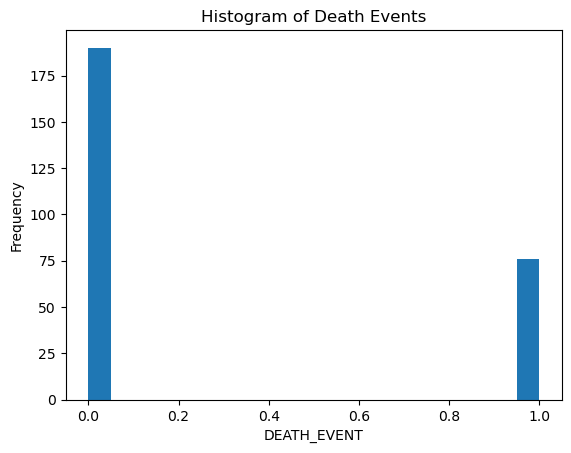

In [64]:
plt.hist(heart_failure_out['DEATH_EVENT'], bins=20)
plt.xlabel('DEATH_EVENT')
plt.ylabel('Frequency')
plt.title('Histogram of Death Events')
plt.show()

In [ ]:
#Resampling required.

In [65]:
!pip install imbalanced-learn

In [66]:
from imblearn.over_sampling import SMOTE


In [67]:
y = heart_failure_out['DEATH_EVENT']
X = heart_failure_out.drop(columns=['DEATH_EVENT'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape: {y.value_counts()}')
print(f'Resampled dataset shape: {pd.Series(y_train_resampled).value_counts()}')

Original dataset shape: DEATH_EVENT
0    190
1     76
Name: count, dtype: int64
Resampled dataset shape: DEATH_EVENT
1    152
0    152
Name: count, dtype: int64


In [69]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88        38
           1       0.68      0.81      0.74        16

    accuracy                           0.83        54
   macro avg       0.80      0.83      0.81        54
weighted avg       0.85      0.83      0.84        54

Confusion Matrix:
 [[32  6]
 [ 3 13]]


In [70]:
#Uneven distribution of target data(Imbalanced distribution)
import xgboost as xgb
from sklearn.model_selection import train_test_split



In [71]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8148148148148148
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        38
           1       0.80      0.50      0.62        16

    accuracy                           0.81        54
   macro avg       0.81      0.72      0.75        54
weighted avg       0.81      0.81      0.80        54

Confusion Matrix:
 [[36  2]
 [ 8  8]]


In [ ]:
#Completed

In [ ]:
#Let's say we also remove serum_creatinine. Let's see what happens

In [75]:
heart_failure_new_exp = heart_failure.drop(columns = ['creatinine_phosphokinase','platelets','serum_creatinine'])

In [76]:
Q1 = heart_failure_new_exp.quantile(0.25)
Q3 = heart_failure_new_exp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
heart_failure_out = heart_failure_new_exp[~((heart_failure_new_exp < (Q1 - 1.5 * IQR)) | (heart_failure_new_exp > (Q3 + 1.5 * IQR))).any(axis=1)]
heart_failure_out.shape


age                    1.600013
anaemia                1.000000
diabetes               1.000000
ejection_fraction      1.269569
high_blood_pressure    1.000000
serum_sodium           1.362060
sex                    1.000000
smoking                1.000000
time                   1.677759
DEATH_EVENT            1.000000
dtype: float64


(293, 10)

In [ ]:
#Now number of outliers decreased and lot of data is saved. But an important feature is lost

In [78]:
y = heart_failure_out['DEATH_EVENT']
X = heart_failure_out.drop(columns=['DEATH_EVENT'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape: {y.value_counts()}')
print(f'Resampled dataset shape: {pd.Series(y_train_resampled).value_counts()}')


Original dataset shape: DEATH_EVENT
0    201
1     92
Name: count, dtype: int64
Resampled dataset shape: DEATH_EVENT
0    165
1    165
Name: count, dtype: int64


In [79]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7627118644067796
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        36
           1       0.71      0.65      0.68        23

    accuracy                           0.76        59
   macro avg       0.75      0.74      0.75        59
weighted avg       0.76      0.76      0.76        59

Confusion Matrix:
 [[30  6]
 [ 8 15]]


In [80]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.864406779661017
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        23

    accuracy                           0.86        59
   macro avg       0.86      0.86      0.86        59
weighted avg       0.86      0.86      0.86        59

Confusion Matrix:
 [[32  4]
 [ 4 19]]


In [ ]:
#logistic regression model is more reliable here since XGBClassifier focuses more on balancing the data.
#According to our prediction Accuracy of logistic regression model dropped (76%).
#Hence we must include serum_creatinine feature.Our previous model was correct.

In [ ]:
#Doubt: Model without resampling is giving more accuracy, then should we drop resampling here?